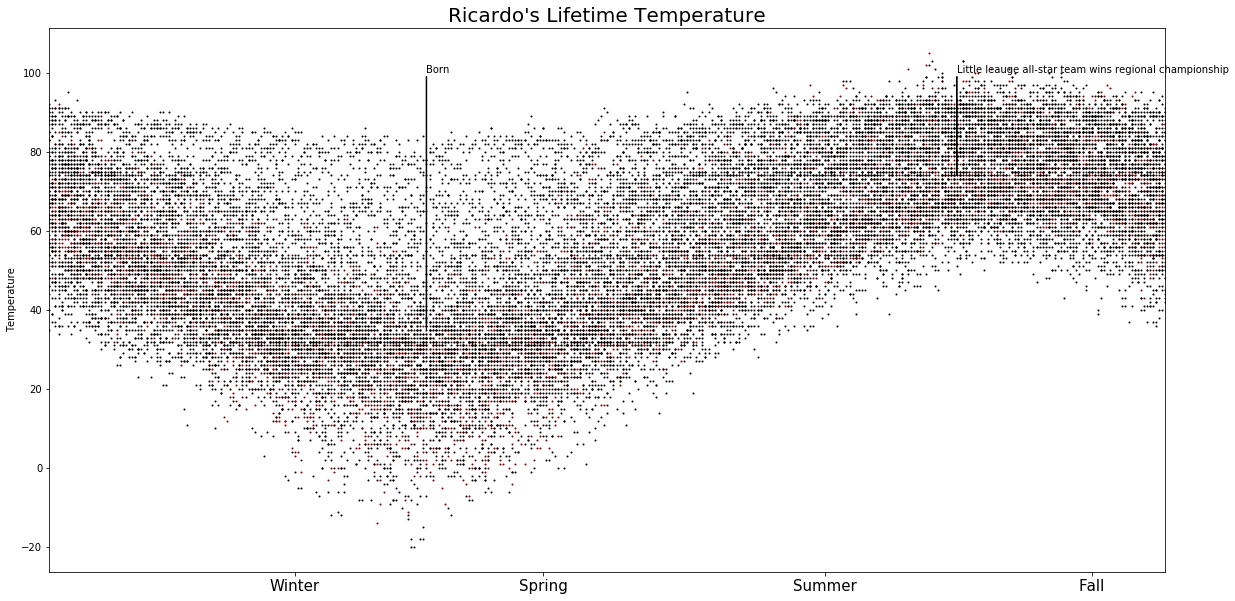

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pylab
from datetime import datetime

index = pd.date_range('12/29/2009', periods=10, freq='D')
path = '/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/temp'
Indi = pd.read_csv(os.path.join(path, 'Indi.csv'), index_col='DATE')
Indi.STATION = 'Indi'
Indi.index = pd.to_datetime(Indi.index, format='%Y%m%d')
Pitt = pd.read_csv(os.path.join(path, 'Pitt.csv'), index_col='DATE')
Pitt.index = pd.to_datetime(Pitt.index, format='%Y%m%d')
Pitt.STATION = 'Pitt'
Miam = pd.read_csv(os.path.join(path, 'Miam.csv'), index_col='DATE')
Miam.index = pd.to_datetime(Miam.index, format='%Y%m%d')
Miam.STATION = 'Miam'
Wash = pd.read_csv(os.path.join(path, 'Wash.csv'), index_col='DATE')
Wash.index = pd.to_datetime(Wash.index, format='%Y%m%d')
Wash.STATION = 'Wash'
Chic = pd.read_csv(os.path.join(path, 'Chic.csv'), index_col='DATE')
Chic.index = pd.to_datetime(Chic.index, format='%Y%m%d')
Chic.STATION = 'Chic'
frames = [Indi, Pitt, Miam, Wash, Chic]
data = pd.concat(frames)
data['day'] = data.index.strftime('%m-%d')

# Prepare for plotting by taking Chicago out
subset = data[data['STATION'].isin(['Indi', 'Pitt','Miam', 'Wash'])]
subset1 = data[data['STATION'].isin(['Chic'])]
tmax = subset.pivot_table('TMAX', index = 'day', columns = subset.index.year)
tmin = subset.pivot_table('TMIN', index = 'day', columns = subset.index.year)
tmax1 = subset1.pivot_table('TMAX', index = 'day', columns = subset1.index.year)
tmin1 = subset1.pivot_table('TMIN', index = 'day', columns = subset1.index.year)
subset = pd.concat([tmax, tmin], axis=1, join='inner')
subset1 = pd.concat([tmax1, tmin1], axis=1, join='inner')

# Manipulate index for re-ordering
subset.index = pd.to_datetime(subset.index, format = '%m-%d', errors = 'coerce')
s1 = subset["1900-09-21":"1900-12-31"]
s2 = subset["1900-01-01":"1900-09-20"]
subset = pd.concat([s1, s2])
subset.index = range(365)

subset1.index = pd.to_datetime(subset1.index, format = '%m-%d', errors = 'coerce')
c1 = subset1["1900-09-21":"1900-12-31"]
c2 = subset1["1900-01-01":"1900-09-20"]
subset1 = pd.concat([c1, c2])
subset1.index = range(365)

pylab.rcParams['figure.figsize'] = (20, 10)
ax = subset1.plot(style = 'o', c='maroon', markersize = 1 , legend = None)
subset.plot(style = 'o', c='k', markersize = 1 , legend = None, ax=ax)
plt.annotate('Born', xy=(123, 35 ),
        xytext=(123, 100),
        arrowprops=dict(facecolor='black', shrink=0, width=0.5, headwidth=1),fontsize='10')

plt.annotate('Little leauge all-star team wins regional championship', xy=(296, 74 ),
        xytext=(296, 100),
        arrowprops=dict(facecolor='black', shrink=0, width=0.5, headwidth=1),fontsize='10')

labels = ['Fall','Winter','Summer','Spring']
positions = [340, 80, 253, 161]
plt.xticks(positions, labels, fontsize = 15)
plt.ylabel('Temperature')
plt.title("Ricardo's Lifetime Temperature", fontsize = 20)
plt.show()